### Questions re data:

* demographics etc?
* symptom groups?
* time series? Even just two timepoints?

In [42]:
import umap
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('../data/cleaned_data_SYMPTOMS_8_24_23.csv', index_col=0)

In [4]:
df

,Symptom_Memory_short,Symptom_Memory_long,Symptom_Memory_no_new_memories,Symptom_Memory_forget_tasks,Symptom_Memory_other,Symptom_Cognitive_Functioning_thinking,Symptom_Cognitive_Functioning_executive,Symptom_Cognitive_Functioning_problemsolving,Symptom_Cognitive_Functioning_slowedthoughts,Symptom_Cognitive_Functioning_fastthoughts,...,Symptom_SkinAllergy_itchy_skin,Symptom_SkinAllergy_itchy_eyes,Symptom_SkinAllergy_heighted_reaction_allergies,Symptom_SkinAllergy_brittle_nail,Symptom_SkinAllergy_new_allergies,Symptom_SkinAllergy_other_itchy,Symptom_SkinAllergy_shingles,Symptom_PEM,Symptom_Fatigue,Symptom_Change_sensitivity_to_meds
3,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0
5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0
9,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14158,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1,1,1
14161,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0
14163,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
14166,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [6]:
df = df.fillna(value=0)

In [7]:
reducer = umap.UMAP()

In [8]:
embedding = reducer.fit_transform(df)

In [9]:
embedding.shape

(6035, 2)

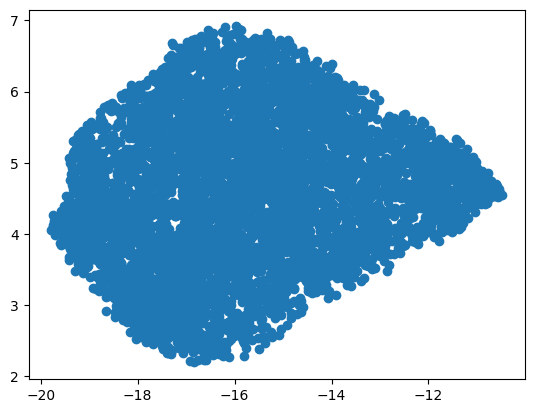

In [10]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
)

In [11]:
reducer.n_neighbors

15

In [20]:
all_embeddings = {}

for i in range(20):
    nn = (i+1) * 5
    reducer = umap.UMAP(n_neighbors=nn)
    all_embeddings[nn] = reducer.fit_transform(df)

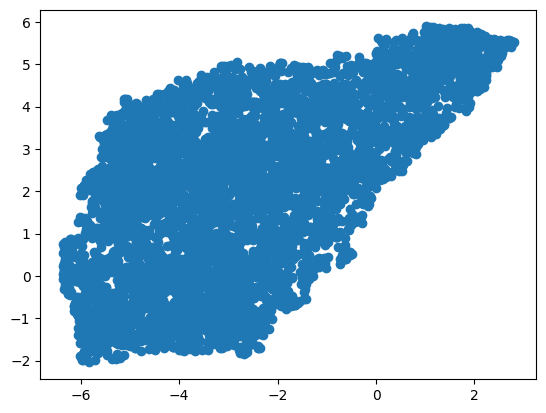

In [21]:
embedding = all_embeddings[5]
plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
)

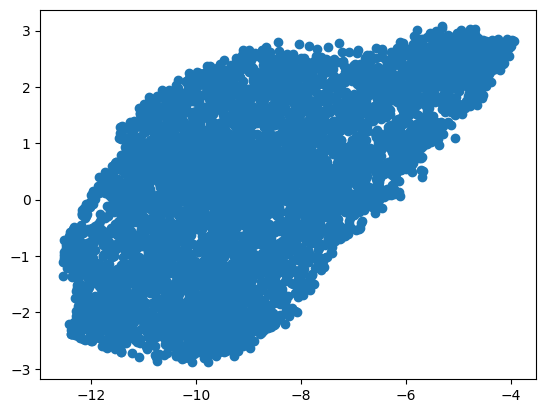

In [22]:
embedding = all_embeddings[10]
plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
)

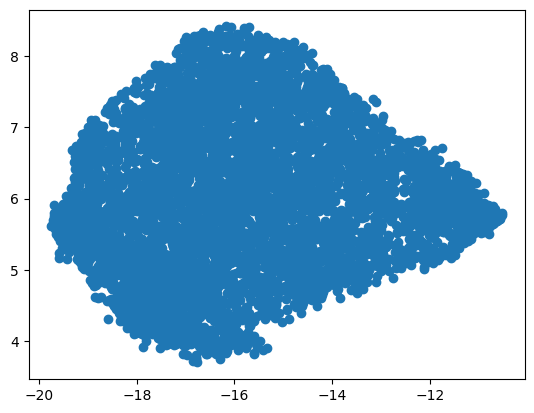

In [23]:
embedding = all_embeddings[15]
plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
)

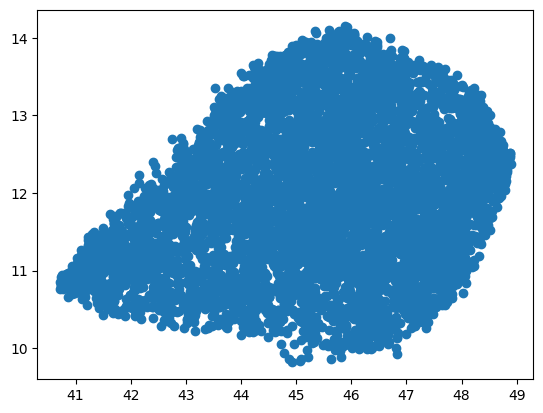

In [24]:
embedding = all_embeddings[50]
plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
)

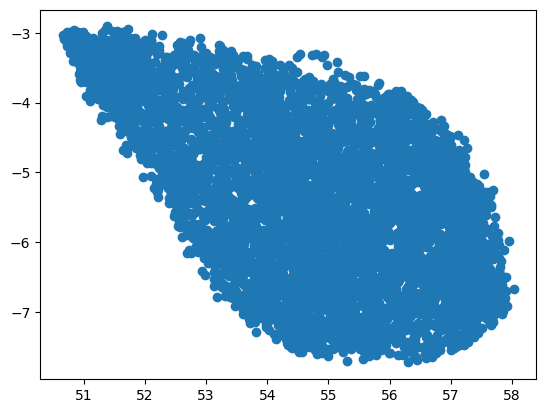

In [25]:
embedding = all_embeddings[80]
plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
)

In [22]:
reducer = umap.UMAP(n_neighbors=2, min_dist=0.05, metric='yule')
em = reducer.fit_transform(df)

/home/expert/Documents/contracting/LCC/PLR/Chris/clusterenv/lib/python3.8/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for yule distance metric; inverse_transform will be unavailable
  warn(


In [23]:
cluster_reducer = umap.UMAP(n_neighbors=2, min_dist=0.05, metric='yule', n_components=100)
cluster_em = cluster_reducer.fit_transform(df)

/home/expert/Documents/contracting/LCC/PLR/Chris/clusterenv/lib/python3.8/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for yule distance metric; inverse_transform will be unavailable
  warn(


In [24]:
import seaborn as sns
import colorcet as cc
from sklearn.cluster import HDBSCAN, AffinityPropagation, AgglomerativeClustering

#### Note: HDBSCAN currently struggling because whole data is dense across the embedding(it seems).

In [25]:
hdb = HDBSCAN(min_cluster_size=20)
# hdb.fit(em)
hdb.fit(cluster_em)

HDBSCAN(min_cluster_size=20)

In [26]:
# afc = AffinityPropagation(random_state=5).fit(cluster_em)
afc = AgglomerativeClustering(n_clusters=None, distance_threshold=100).fit(cluster_em)
afc = AgglomerativeClustering(n_clusters=None, distance_threshold=100).fit(em)

In [27]:
max(afc.labels_)

13

/tmp/ipykernel_88877/1615380279.py:1: UserWarning: The palette list has more values (65) than needed (14), which may not be intended.
  sns.scatterplot(


<Axes: >

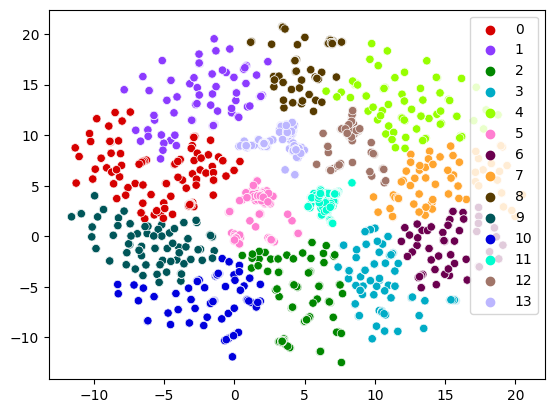

In [28]:
sns.scatterplot(
    x=em[:, 0],
    y=em[:, 1],
    # c=[sns.color_palette()[x] for x in hdb.labels_],
    palette = sns.color_palette(cc.glasbey, n_colors=max(hdb.labels_)+1),
    # hue=hdb.labels_,
    hue=afc.labels_,
    data=em
)

#### Maybe PCA will work?

#### Crude severity metric: number of symptoms.

In [18]:
severity = df.sum(axis=1)

In [19]:
severity

3        21.0
5        45.0
6        32.0
8        58.0
9        51.0
         ... 
14158    54.0
14161    35.0
14163    64.0
14166    22.0
14168    36.0
Length: 6035, dtype: float64

In [20]:
severity.max()

158.0

In [21]:
severity_normalised = severity / severity.max()

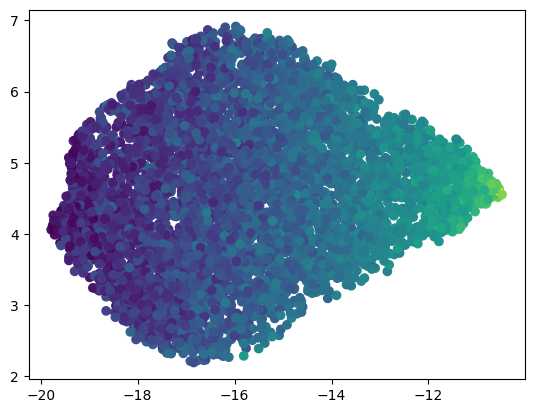

In [29]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=severity_normalised
)

In [31]:
em.shape

(6035, 2)

#### Severity across the AFC clusters above:

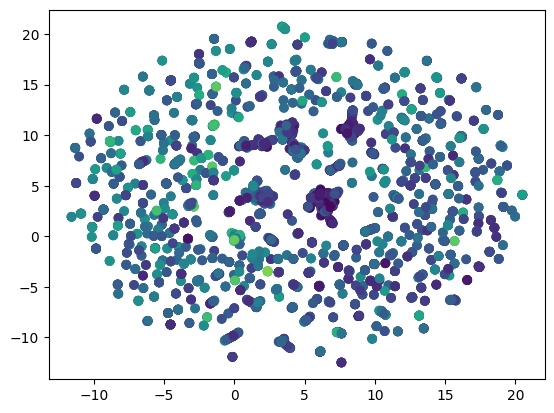

In [32]:
plt.scatter(
    x=em[:, 0],
    y=em[:, 1],
    c=severity_normalised
)

#### Total severity distribution:

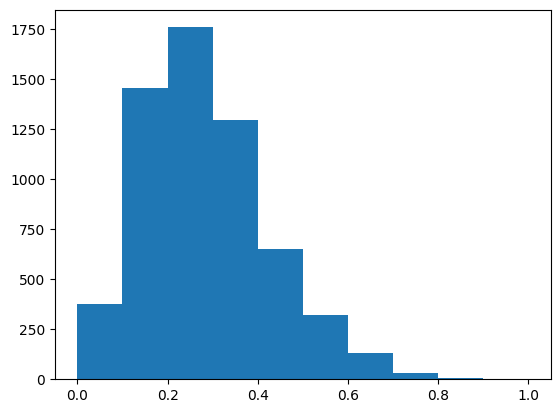

In [57]:
plt.hist(severity_normalised);

#### Severity within each cluster

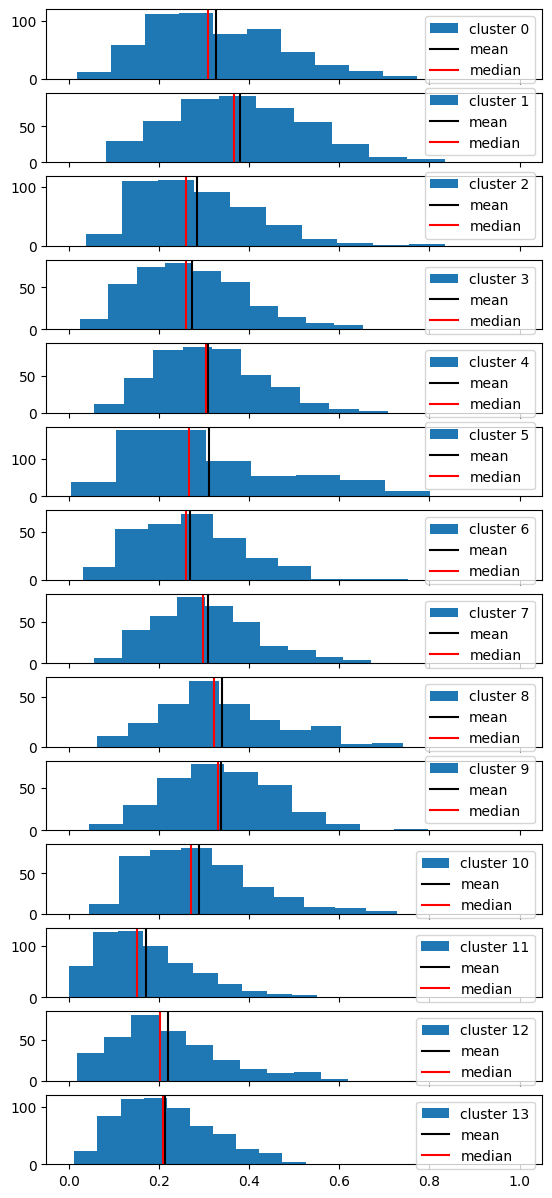

In [56]:
fig, axs = plt.subplots(len(np.unique(afc.labels_)), 1, sharex=True)
fig.set_figheight(15)
for i, cid in enumerate(np.unique(afc.labels_)):
    
    axs[i].hist(severity_normalised[afc.labels_ == cid], label='cluster %d' % cid)
    axs[i].axvline(severity_normalised[afc.labels_ == cid].mean(), label='mean', color='k')
    axs[i].axvline(severity_normalised[afc.labels_ == cid].median(), label='median', color='r')
    axs[i].legend();

### Now look at number of symptoms within each group...

Note: I know we probably don't trust these groups, but we can swap in other symptoms groupings later on.